# **Apply Denoising Filters**


In this lab, you will study the performance of the filters in denoising images.
Write your own functions. You can use an image which is photographs corrupted
with different types of noise (a sample image is given in the course page).
Try to reduce the effect of noise from each of them by applying:


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

1. Apply Mean filtering with mask size 3x3 and 5x5

In [2]:
def mean_filter(img, kernel_size):

  kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
  filtered_img = cv2.filter2D(img, -1, kernel)
  return filtered_img


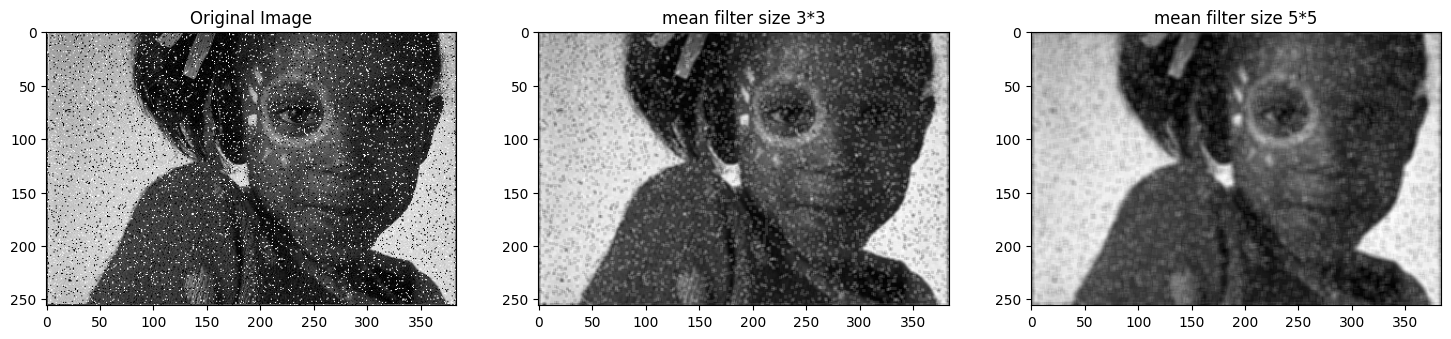

In [3]:
img = cv2.imread('/content/data/Sample image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply required filters with differen sizes
mean3 = mean_filter(img, 3)
mean5 = mean_filter(img, 5)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("mean filter size 3*3")
plt.imshow(mean3, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("mean filter size 5*5")
plt.imshow(mean5, cmap='gray')
plt.show()


In the mean filter, since the middle element replaced by the mean value of the naibor elements, as the kernel size increase, the blure gets stronger. How ever the noice and the edges also do gets blured.

2. Apply Highpass filtering with mask size 3x3 and 5x5

In [4]:
def highpass_filter(img, kernel_size):

  kernel = np.array([
      [0, -1, 0],
      [-1, 4, -1],
      [0, -1, 0]
  ], dtype=np.float32)

  if kernel_size == 5:
    kernel = np.array([
      [0,0,-1,0,0],
      [0,-1,-2,-1,0],
      [-1,-2,16,-2,-1],
      [0,-1,-2,-1,0],
      [0,0,-1,0,0]
    ], dtype=np.float32)

  filtered_img = cv2.filter2D(img,-1,kernel)
  return filtered_img

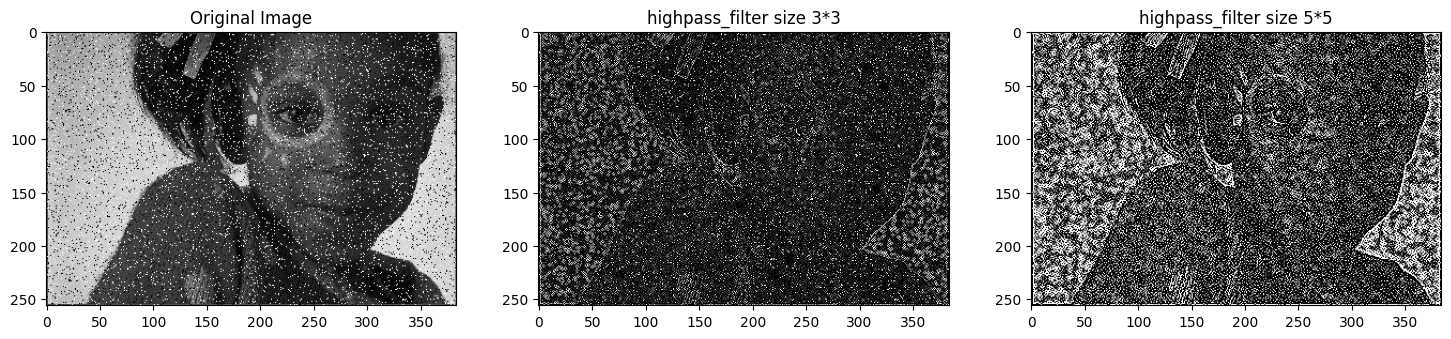

In [5]:
# Applying different size filters
highpass3 = highpass_filter(img,3)
highpass5 = highpass_filter(img,5)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("highpass_filter size 3*3")
plt.imshow(highpass3, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("highpass_filter size 5*5")
plt.imshow(highpass5, cmap='gray')
plt.show()

high pass filter have been able to identify the sudden changes and therefore enhanced edges, however the noice is also amplified.

3. Apply lowpass filtering with mask size 3x3 and 5x5

In [6]:
def lowpass_filter(img, kernel_size):
    if kernel_size == 3:
        kernel = np.array([
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]
        ], dtype=np.float32)
    elif kernel_size == 5:
        kernel = np.array([
            [1/25, 1/25, 1/25, 1/25, 1/25],
            [1/25, 1/25, 1/25, 1/25, 1/25],
            [1/25, 1/25, 1/25, 1/25, 1/25],
            [1/25, 1/25, 1/25, 1/25, 1/25],
            [1/25, 1/25, 1/25, 1/25, 1/25]
        ], dtype=np.float32)
    else:
        return img  # Or raise an exception for invalid kernel size

    filtered_img = cv2.filter2D(img, -1, kernel)
    return filtered_img

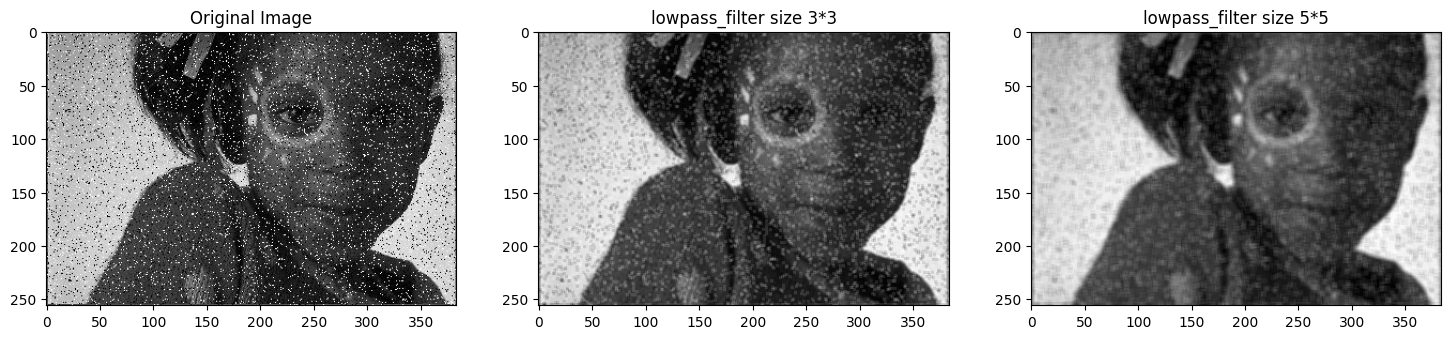

In [7]:

# Applying different size filters
lowpass3 = lowpass_filter(img, 3)
lowpass5 = lowpass_filter(img, 5)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("lowpass_filter size 3*3")
plt.imshow(lowpass3, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("lowpass_filter size 5*5")
plt.imshow(lowpass5, cmap='gray')
plt.show()

Since the lowpass filter only alows low frequencies, thesmooth changes are amlified and sudden changs are removed, therefore result looks like mean filter.

4. A bilateral filter with mask size 5 × 5 with appropriate values of σ and , set 2 d
σr 2 through experimentation.

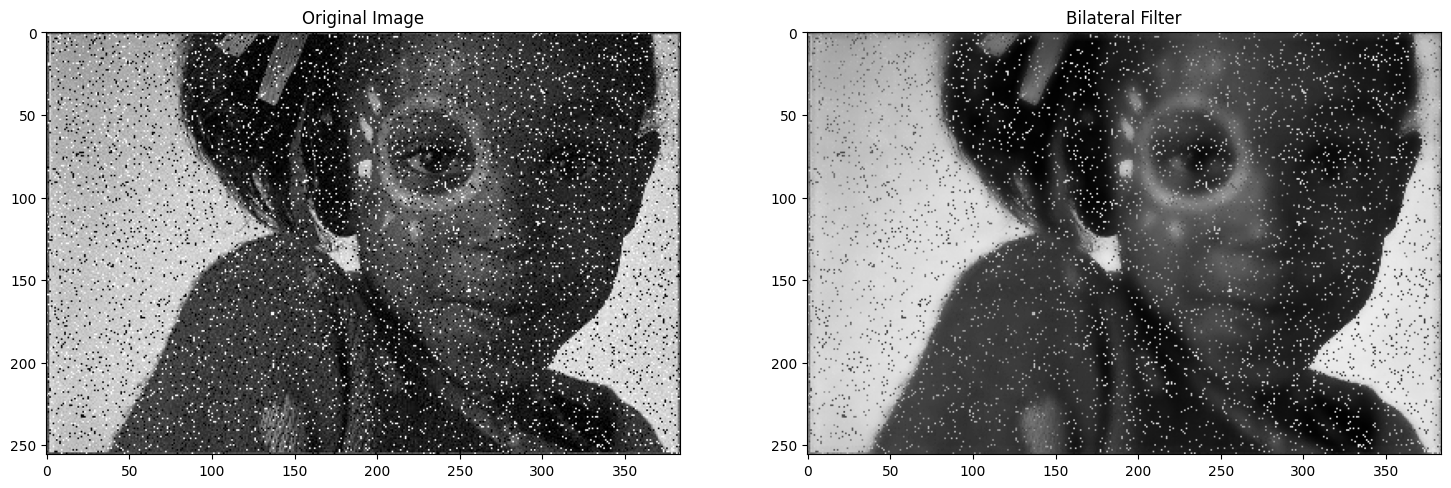

In [25]:
bilateral = cv2.bilateralFilter(img, 10, 80, 100) #Adjusting (sigmaColor, sigmaSpace)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Bilateral Filter")
plt.imshow(bilateral, cmap='gray')
plt.show()

bilateral filter has manged to significantly reduce blure while without bluring important details edges.



5. A Gaussian filter with mask size 5 × 5 appropriate values of σ .

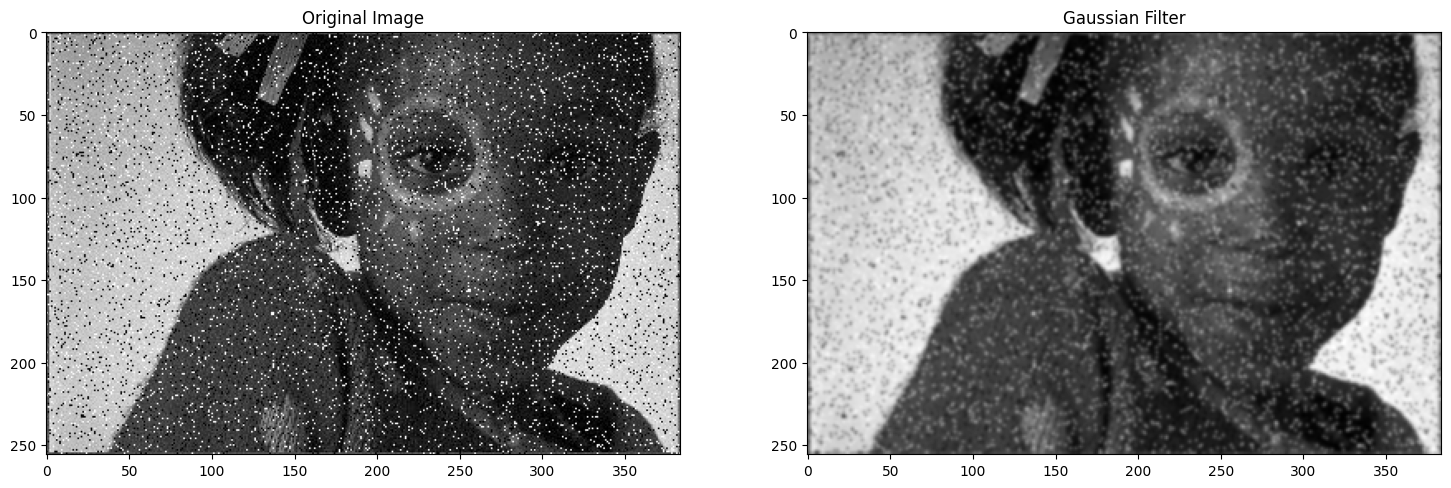

In [9]:
def gaussian_filter(img, kernel_size, sigma):
  # Geteraing a gaussian kernel
  kernel = cv2.getGaussianKernel(kernel_size, sigma)
  kernel = kernel * kernel.transpose()

  # Apply the gaussian filter
  filtered_img = cv2.filter2D(img, -1, kernel)
  return filtered_img

gaussian_filtered_img = gaussian_filter(img, 5, 1)
# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Gaussian Filter")
plt.imshow(gaussian_filtered_img, cmap='gray')
plt.show()

gaussian blure has blured the image overall with the noice.

6. A laplacian filter with mask size 5 × 5 appropriate values of σ .

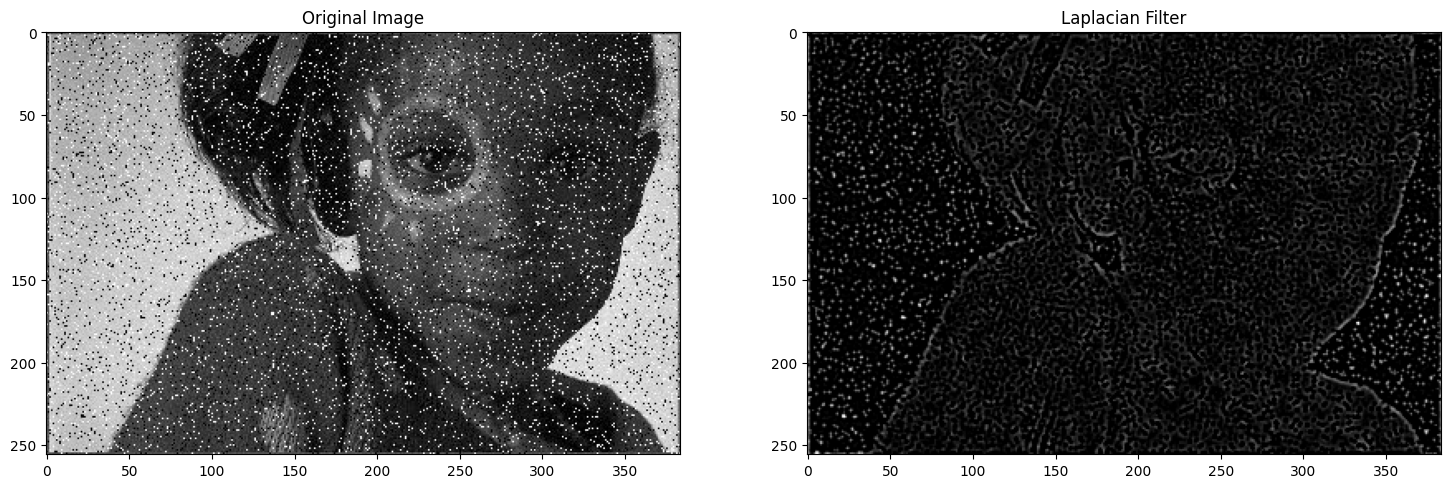

In [27]:
def laplacian_filter(img, kernel_size, sigma):
    # Generate a Gaussian kernel
    kernel_gaussian = cv2.getGaussianKernel(kernel_size, sigma)
    kernel_gaussian = kernel_gaussian * kernel_gaussian.transpose()

    # Create the Laplacian kernel
    kernel_laplacian = np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ], dtype=np.float32)

    # Apply Gaussian blur first
    blurred_img = cv2.filter2D(img, -1, kernel_gaussian)

    # Apply the Laplacian filter to the blurred image
    laplacian_img = cv2.filter2D(blurred_img, -1, kernel_laplacian)

    return laplacian_img

laplacian_filtered_img = laplacian_filter(img, 5, 1)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Laplacian Filter")
plt.imshow(laplacian_filtered_img, cmap='gray')
plt.show()

this worked as a edge detection and have managed to detect edges even with the high noice.


7. A median filter of appropriate window size. Verify your implementation with
OpenCV filtering functions

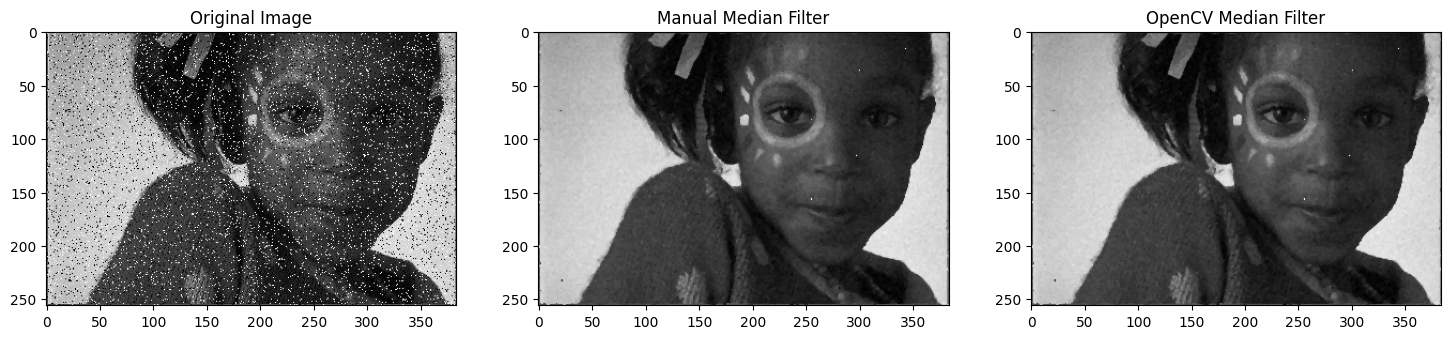

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter_manual(img, kernel_size):
    rows, cols = img.shape
    filtered_img = np.zeros_like(img)

    padding = kernel_size // 2
    padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

    for i in range(rows):
        for j in range(cols):
            # Corrected neighborhood extraction
            neighborhood = padded_img[i:i + kernel_size, j:j + kernel_size]
            filtered_img[i, j] = np.median(neighborhood)
    return filtered_img

# Load the image in grayscale
img = cv2.imread('/content/data/Sample image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply manual median filter
manual_median = median_filter_manual(img, 3)

# Apply OpenCV's median filter for comparison
opencv_median = cv2.medianBlur(img, 3)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Manual Median Filter")
plt.imshow(manual_median, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("OpenCV Median Filter")
plt.imshow(opencv_median, cmap='gray')

plt.show()

The median filter has managed to significantly remove the noice and keep important details as it is.

Analising the results with histogram

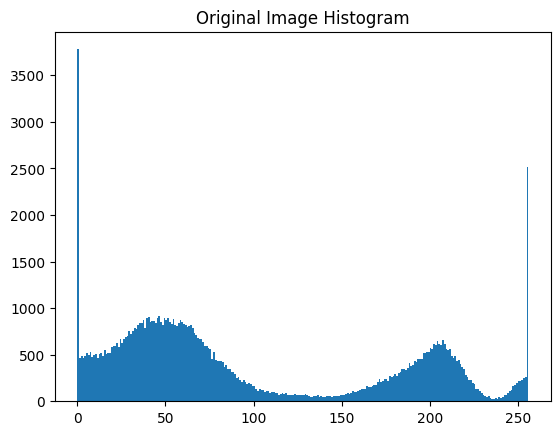

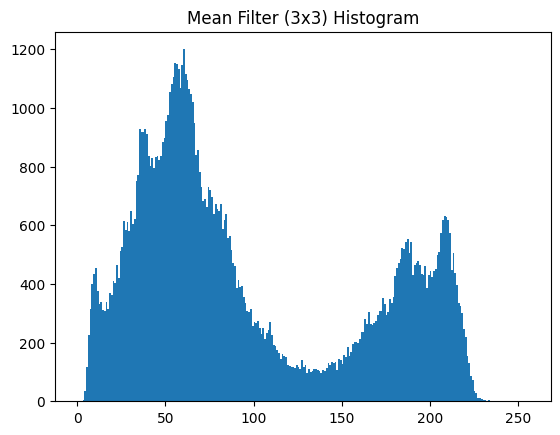

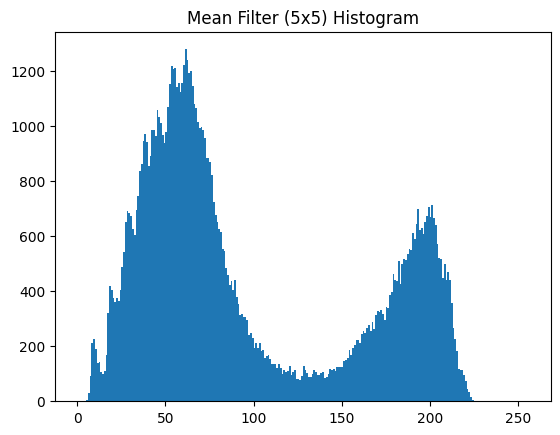

In [28]:
def show_histogram(img, title):
    plt.figure()
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title(title)
    plt.show()

# Before and after histograms for each filter

#1 Mean filter
show_histogram(img, 'Original Image Histogram')
show_histogram(mean3, 'Mean Filter (3x3) Histogram')
show_histogram(mean5, 'Mean Filter (5x5) Histogram')

In the original image histogram it is visible the noice is at the top and the bottom edges of the histogram. after mean filter applied, according to the histogram the noice is changed into average color.   

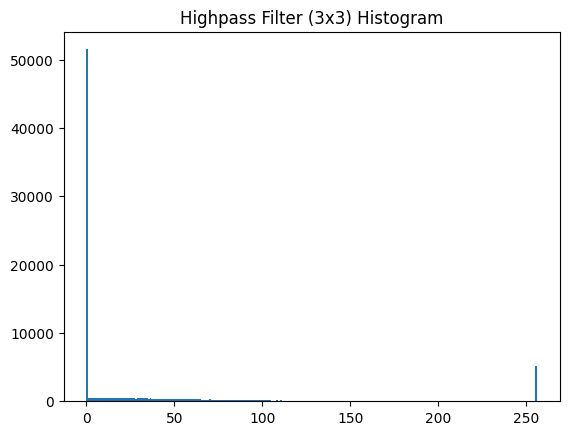

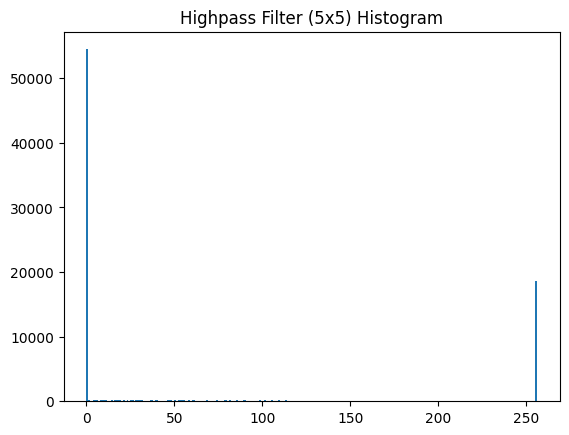

In [29]:
# 2. Highpass filter
show_histogram(img, 'Original Image Histogram')
show_histogram(highpass3, 'Highpass Filter (3x3) Histogram')
show_histogram(highpass5, 'Highpass Filter (5x5) Histogram')

high pass filter have filtered in the noice that was availabe in the original hostogram. therefore noive is significantly visible.

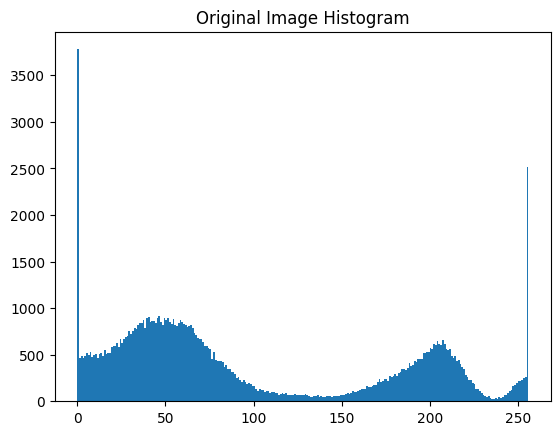

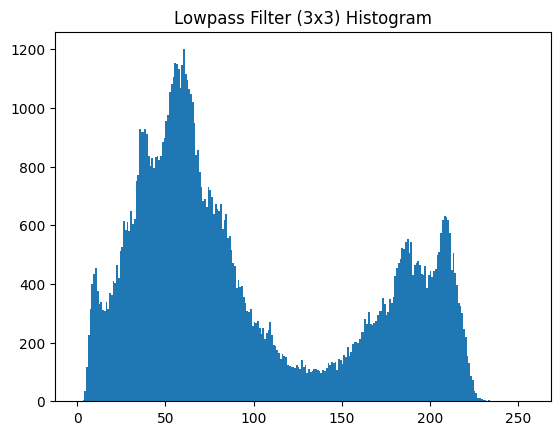

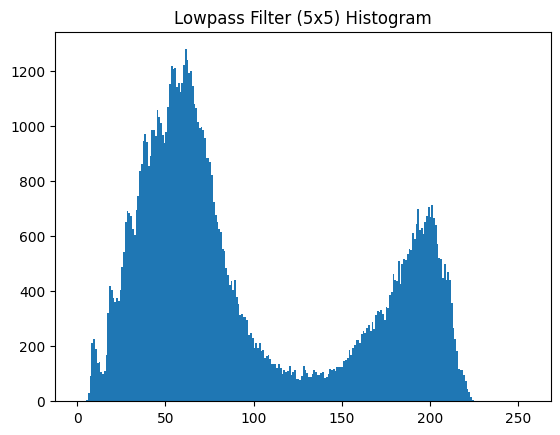

In [30]:
# 3. Lowpass filter
show_histogram(img, 'Original Image Histogram')
show_histogram(lowpass3, 'Lowpass Filter (3x3) Histogram')
show_histogram(lowpass5, 'Lowpass Filter (5x5) Histogram')

lowpass filter has worked identical to the mean filter.

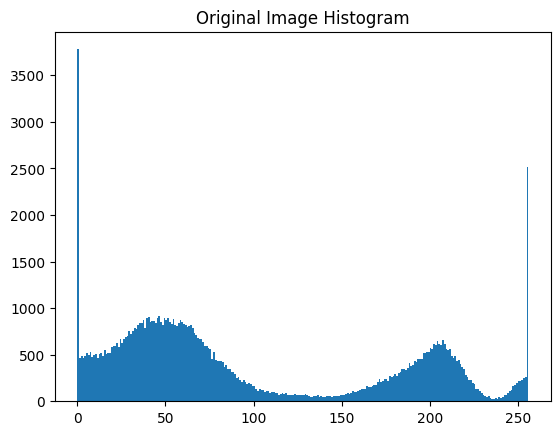

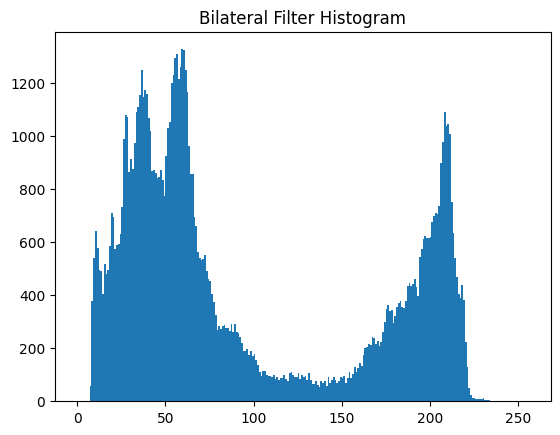

In [31]:
# 4. Bilateral Filter
show_histogram(img, 'Original Image Histogram')
show_histogram(bilateral, 'Bilateral Filter Histogram')

This has rmoved the highest and lowest intensity pixels.

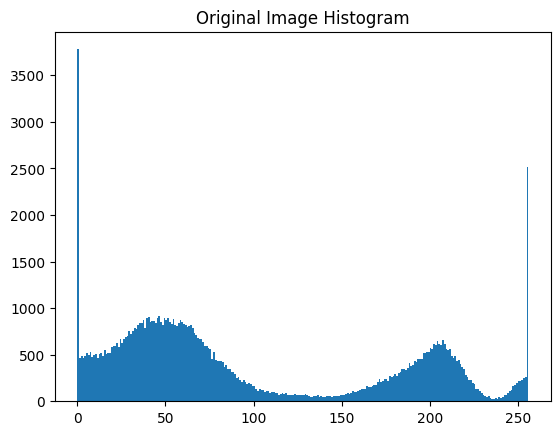

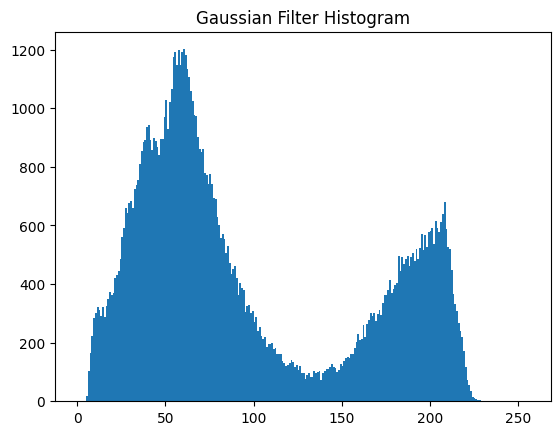

In [32]:
# 5. Gaussian Filter
show_histogram(img, 'Original Image Histogram')
show_histogram(gaussian_filtered_img, 'Gaussian Filter Histogram')

gaussian filter has managed to successfully blured and smoothed out the images.

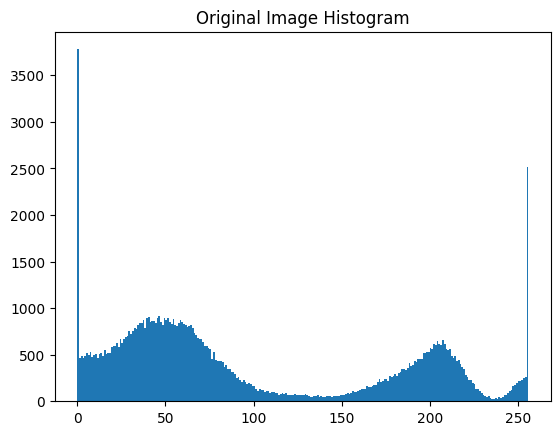

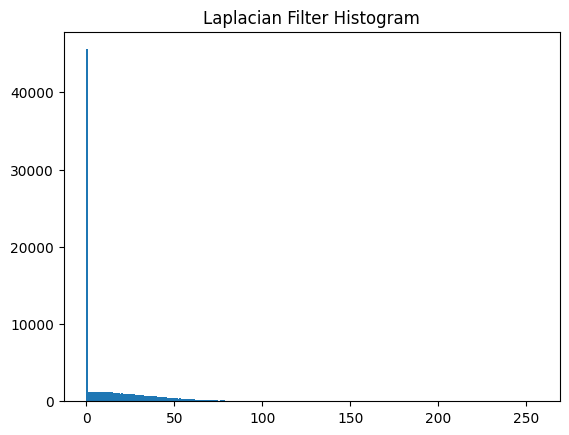

In [33]:
# 6. Laplacian Filter
show_histogram(img, 'Original Image Histogram')
show_histogram(laplacian_filtered_img, 'Laplacian Filter Histogram')

laplacina filter has removed all the various intensity values and create a image with cleary identifiable intensity values only.

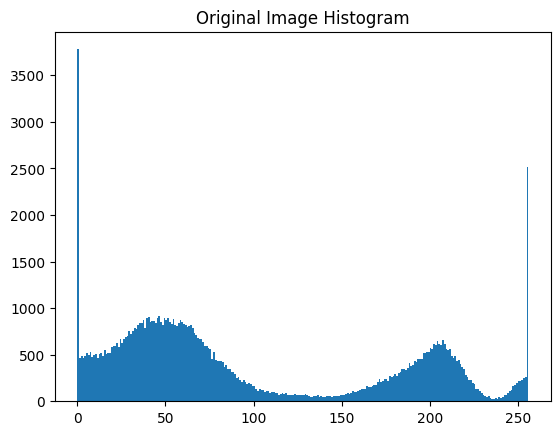

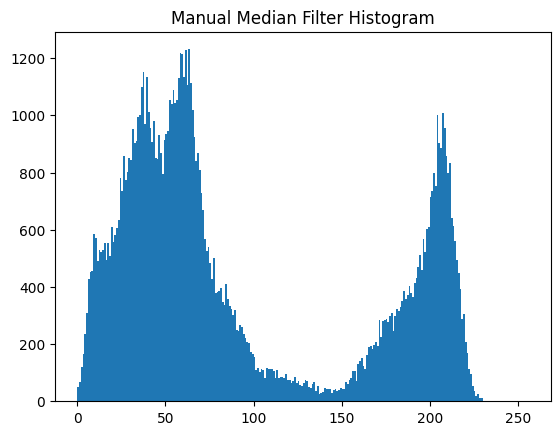

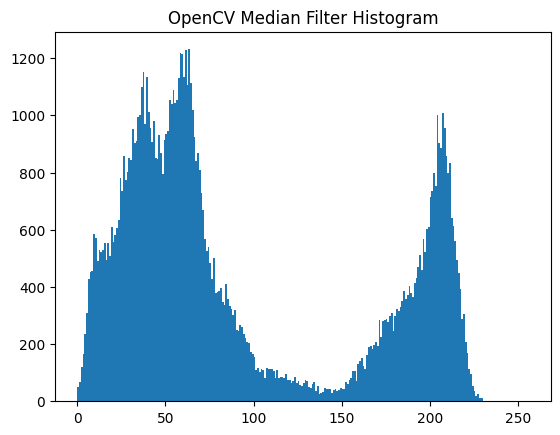

In [34]:
# 7. Median Filter
show_histogram(img, 'Original Image Histogram')
show_histogram(manual_median, 'Manual Median Filter Histogram')
show_histogram(opencv_median, 'OpenCV Median Filter Histogram')

meadian filter histogram is also similer to the histogram of the mean filter and the gaussina filter, but by observing the images we can see that in the median filter the noice is replaced my more accurate pixels than in gaussian and the mean filter managed to do.